In [ ]:
Roll no:108806
Name: Rohith R
course name:DA
batch:geetika mam batch (9:30 to 11:30)

In [1]:
# !pip install lightgbm
# !pip install xgboost

In [2]:
# import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA):( Test data)

In [4]:
df_test = pd.read_csv('Titanic_test.csv')
df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [5]:
# shape of the test data set

df_test.shape

(418, 11)

In [6]:
# full information of the test data set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
# checking the duplicated values in test data set
df_test.duplicated().sum()

0

In [8]:
# drop the unvanted variables
df_test_data = df_test.drop(columns = ['PassengerId','Name','Ticket'],axis = 1)
print(df_test_data)

     Pclass     Sex   Age  SibSp  Parch      Fare Cabin Embarked
0         3    male  34.5      0      0    7.8292   NaN        Q
1         3  female  47.0      1      0    7.0000   NaN        S
2         2    male  62.0      0      0    9.6875   NaN        Q
3         3    male  27.0      0      0    8.6625   NaN        S
4         3  female  22.0      1      1   12.2875   NaN        S
..      ...     ...   ...    ...    ...       ...   ...      ...
413       3    male   NaN      0      0    8.0500   NaN        S
414       1  female  39.0      0      0  108.9000  C105        C
415       3    male  38.5      0      0    7.2500   NaN        S
416       3    male   NaN      0      0    8.0500   NaN        S
417       3    male   NaN      1      1   22.3583   NaN        C

[418 rows x 8 columns]


In [9]:
# checking the missing values
df_test_data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
# mean and mode of the missing varables
print(df_test_data['Age'].mean())
print(df_test_data['Cabin'].mode())

30.272590361445783
0    B57 B59 B63 B66
Name: Cabin, dtype: object


In [11]:
df_test_data['Fare'].mean()

35.627188489208635

In [12]:
# fill the missing values with mean and mode 
df_test_data['Age'].fillna(value = df_test_data['Age'].mean(),inplace = True)
df_test_data['Fare'].fillna(value = df_test_data['Fare'].mean(),inplace = True)
df_test_data['Cabin'].fillna(value = df_test_data['Cabin'].mode().iloc[0],inplace = True)

In [13]:
# describe the data test
df_test_data.describe()

Pclass         Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000  418.000000
mean     2.265550   30.272590    0.447368    0.392344   35.627188
std      0.841838   12.634534    0.896760    0.981429   55.840500
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000   23.000000    0.000000    0.000000    7.895800
50%      3.000000   30.272590    0.000000    0.000000   14.454200
75%      3.000000   35.750000    1.000000    0.000000   31.500000
max      3.000000   76.000000    8.000000    9.000000  512.329200

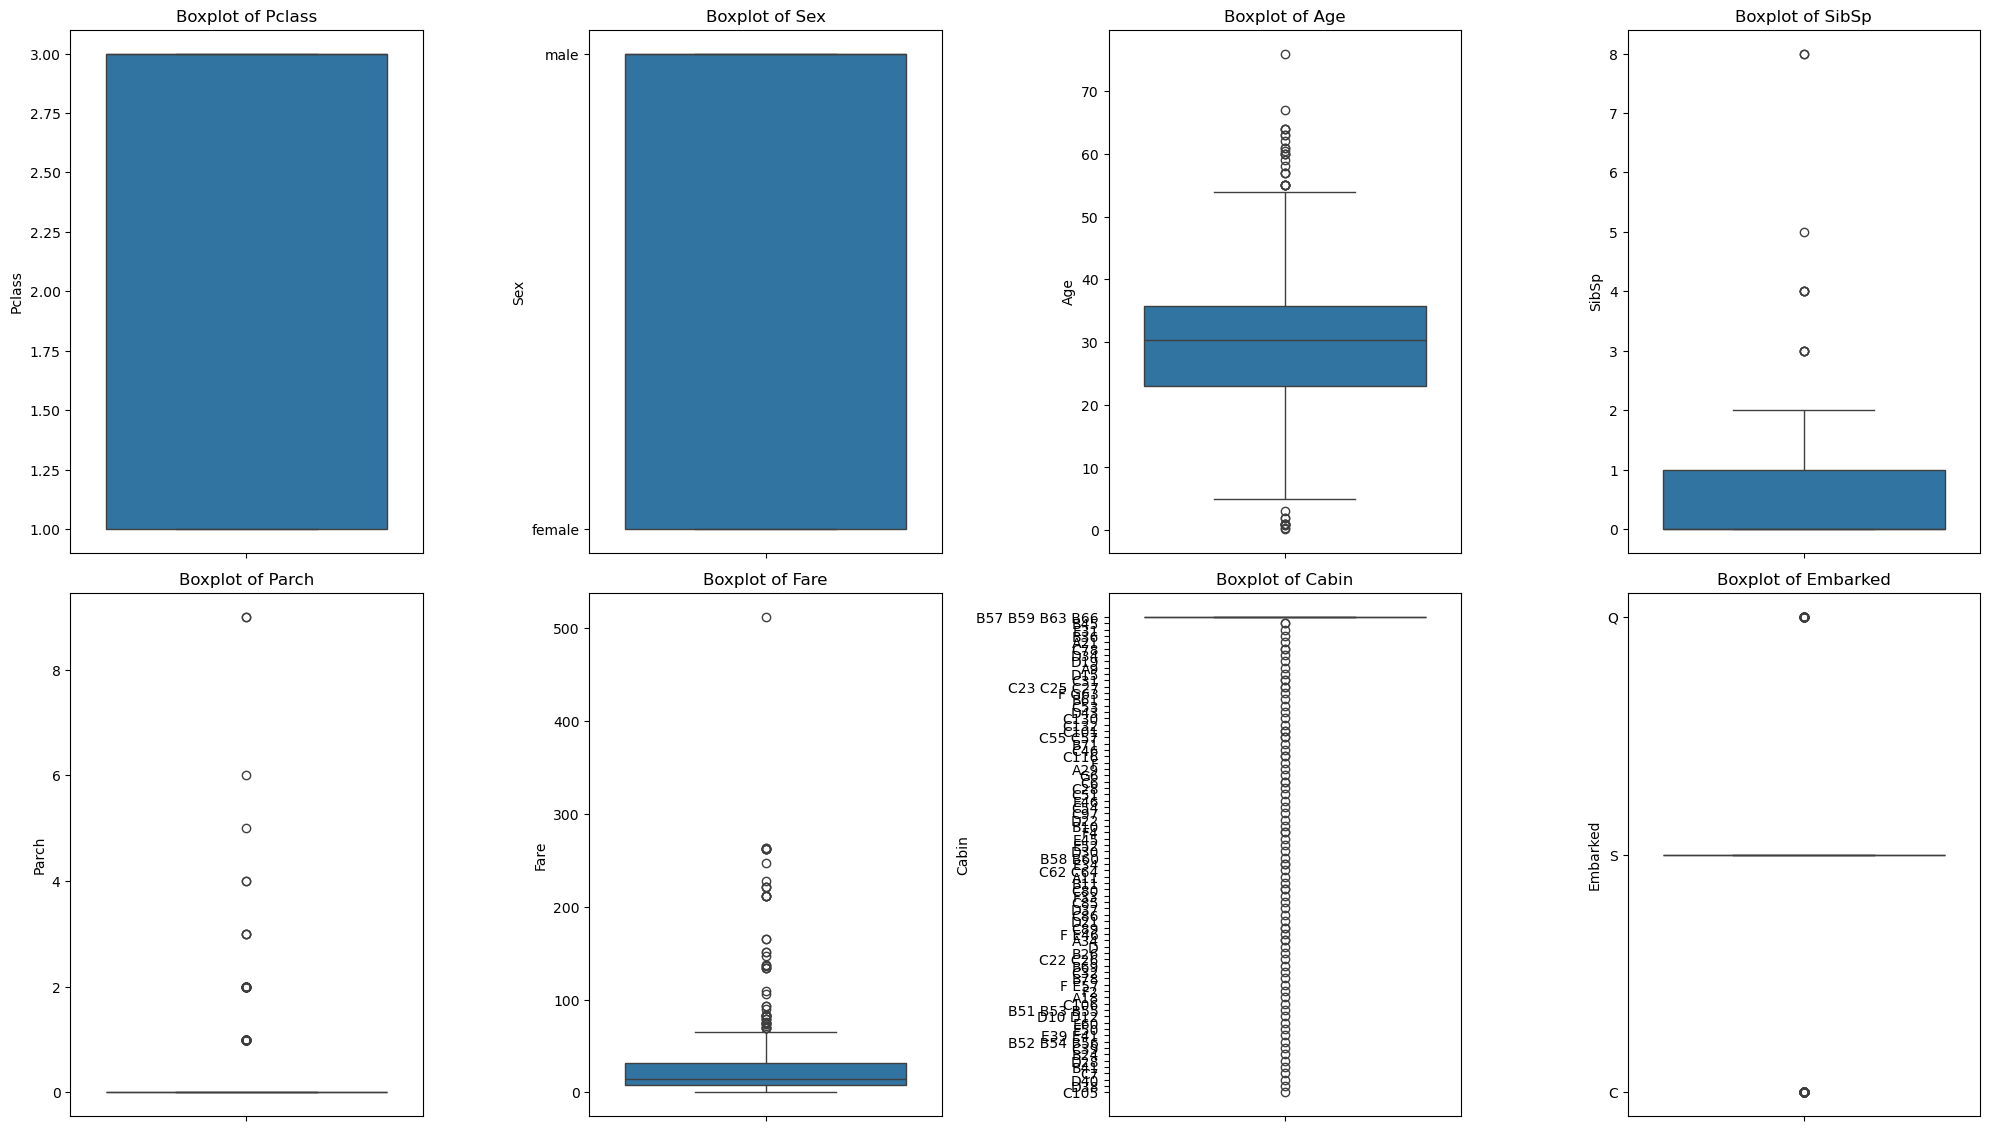

In [14]:
# creat a boxplot to identify the outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,17))
for i,column in enumerate(df_test_data.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(df_test_data[column],vert=True)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

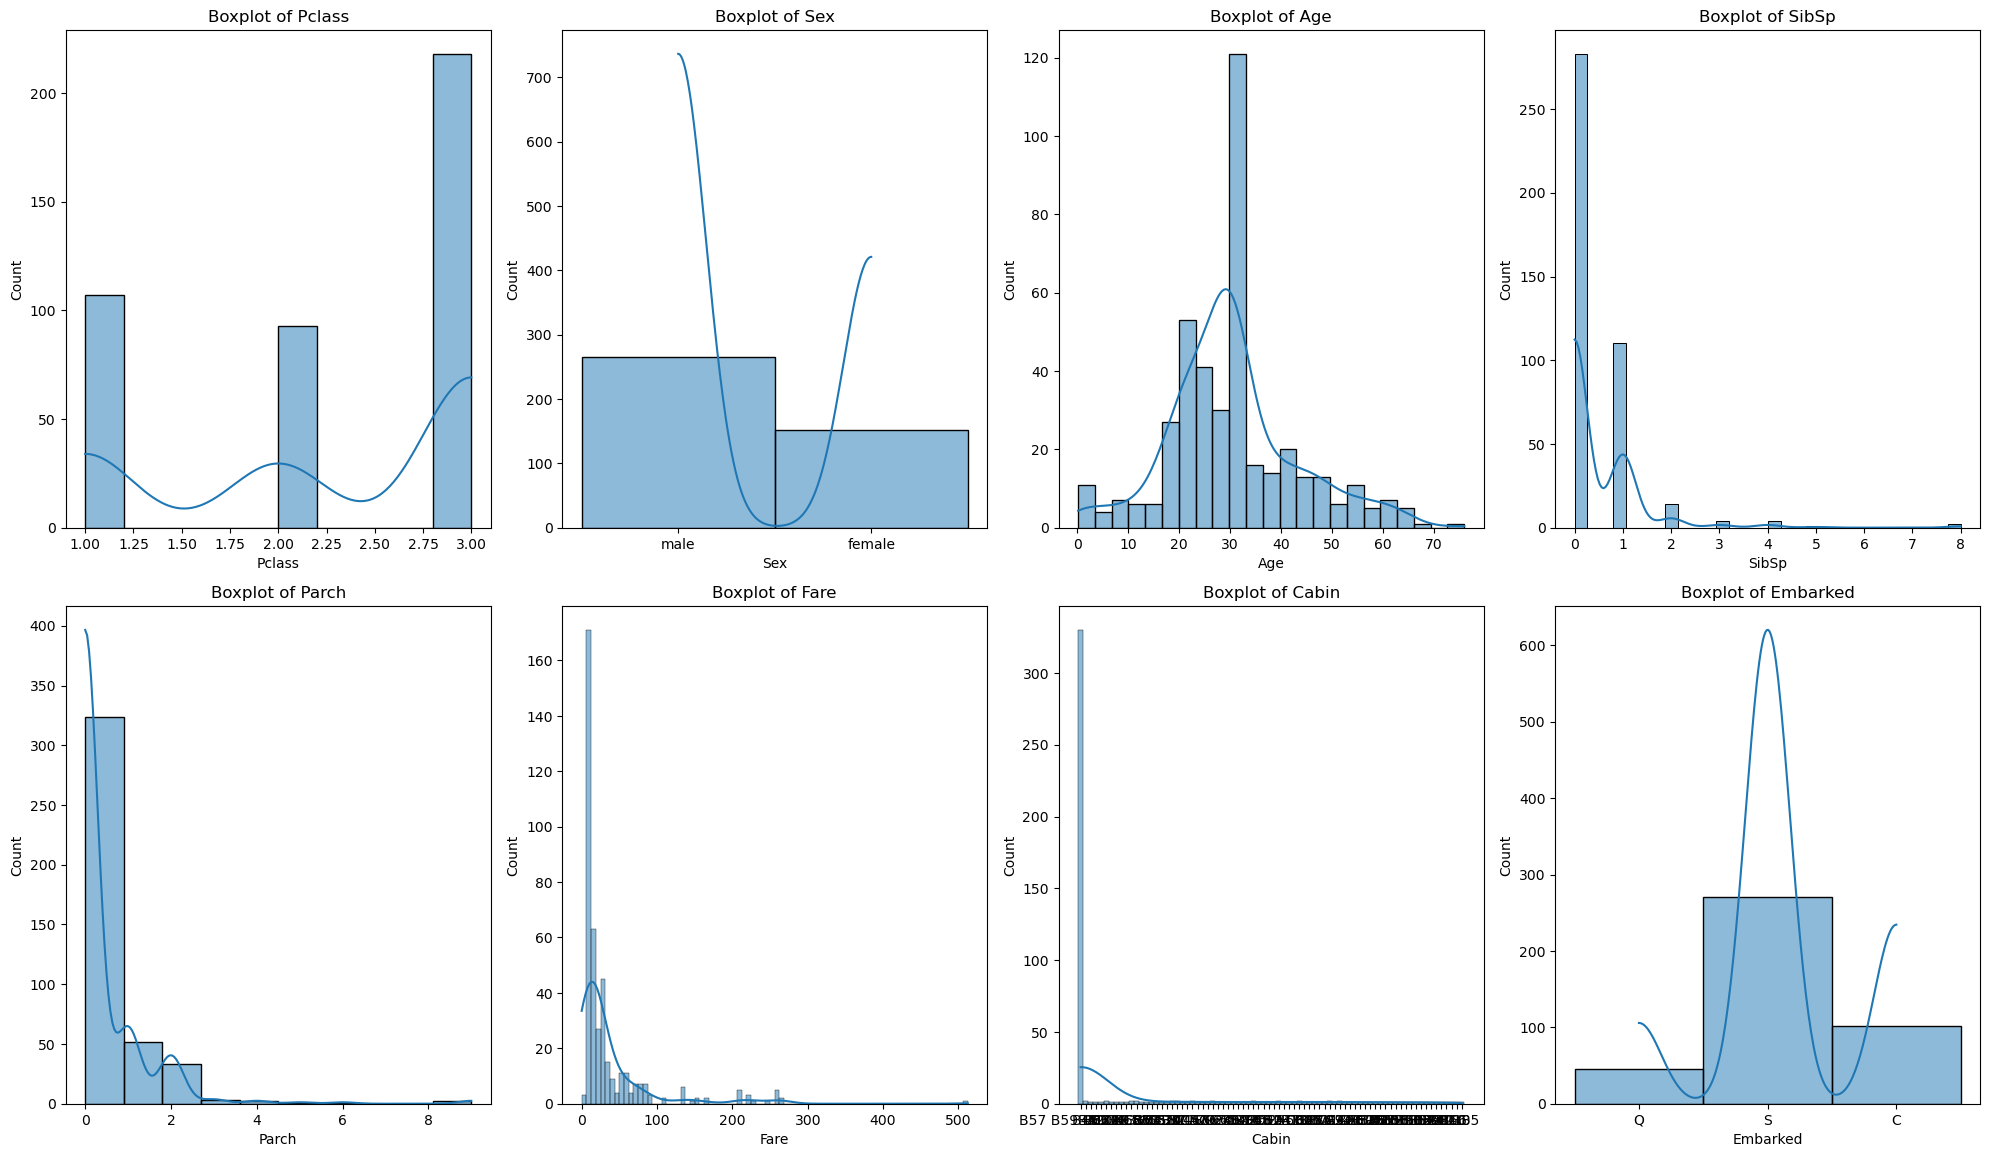

In [15]:
# creat a histogram to identify the skewness
plt.figure(figsize = (20,17))
for i,column in enumerate(df_test_data.columns):
    plt.subplot(3,4,i+1)
    sns.histplot(df_test_data[column],kde=True)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

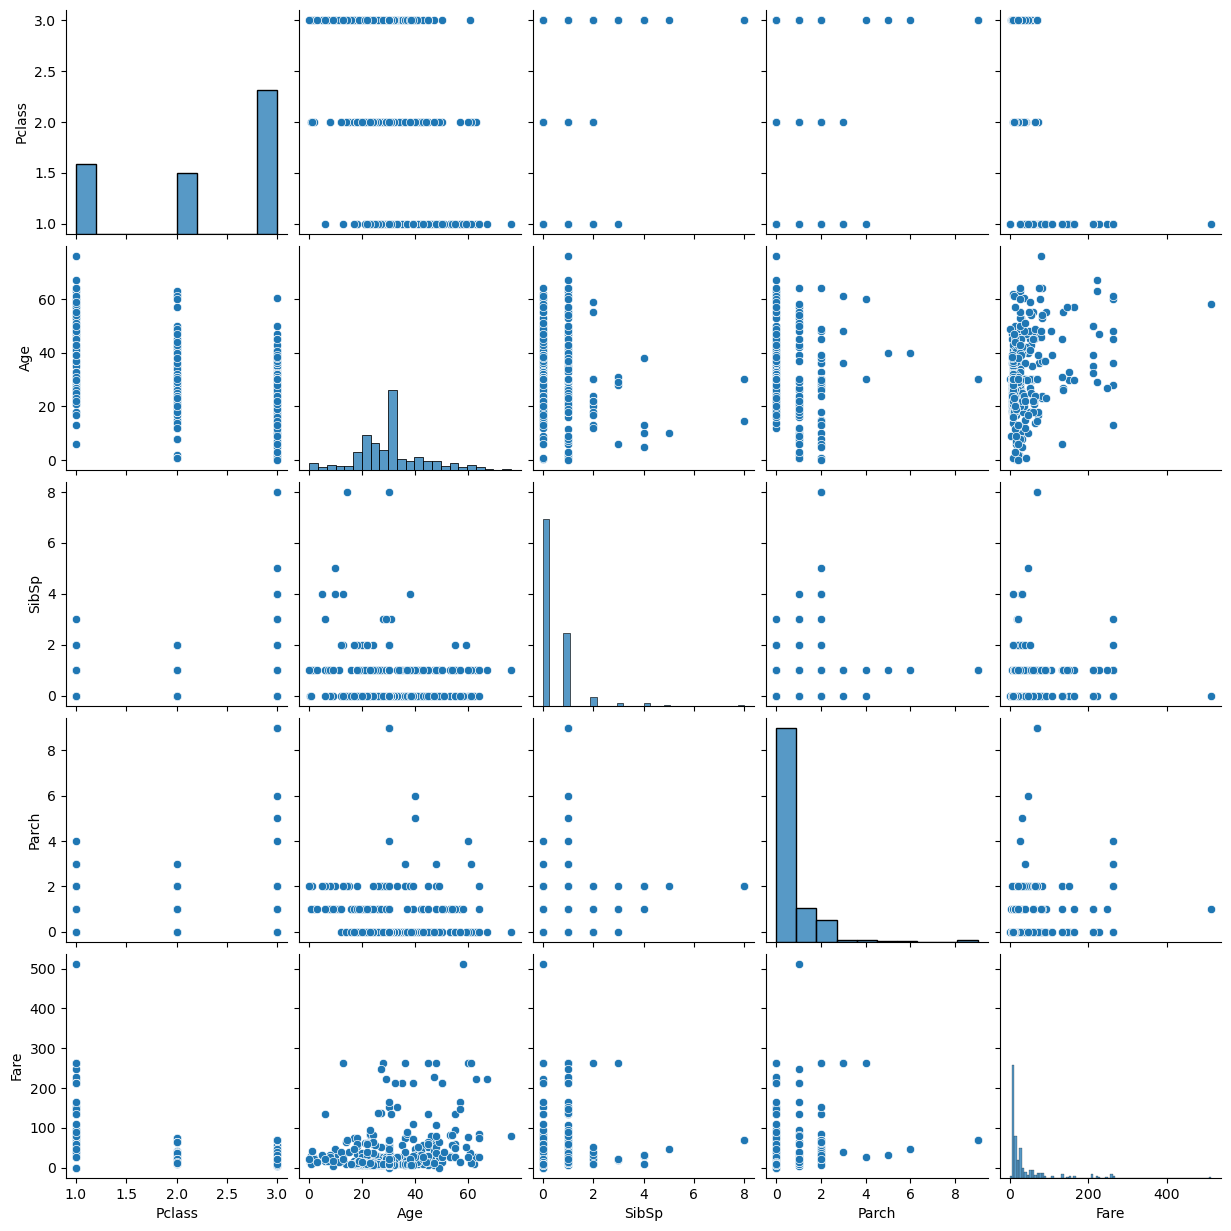

In [16]:
# creat a pair plot 
sns.pairplot(df_test_data)
plt.show()

# Data Preprocessing:

In [18]:
# LabelEncoding the data
from sklearn.preprocessing import LabelEncoder

# Select categorical columns (list, not DataFrame)
object_cols = ['Sex','Cabin','Embarked']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in object_cols:
    df_test_data[col] = le.fit_transform(df_test_data[col].astype(str))  # Convert to string if needed

df_test_data  # Display

Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked
0         3    1  34.50000      0      0    7.8292     15         1
1         3    0  47.00000      1      0    7.0000     15         2
2         2    1  62.00000      0      0    9.6875     15         1
3         3    1  27.00000      0      0    8.6625     15         2
4         3    0  22.00000      1      1   12.2875     15         2
..      ...  ...       ...    ...    ...       ...    ...       ...
413       3    1  30.27259      0      0    8.0500     15         2
414       1    0  39.00000      0      0  108.9000     22         0
415       3    1  38.50000      0      0    7.2500     15         2
416       3    1  30.27259      0      0    8.0500     15         2
417       3    1  30.27259      1      1   22.3583     15         0

[418 rows x 8 columns]

In [19]:
# Normalization the data
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]
numeric = df_test_data[numeric_cols]  

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
df_test_data[numeric_cols] = scaler.fit_transform(df_test_data[numeric_cols])

df_test_data.head() 

Pclass  Sex       Age  SibSp     Parch      Fare  Cabin  Embarked
0     1.0    1  0.452723  0.000  0.000000  0.015282     15         1
1     1.0    0  0.617566  0.125  0.000000  0.013663     15         2
2     0.5    1  0.815377  0.000  0.000000  0.018909     15         1
3     1.0    1  0.353818  0.000  0.000000  0.016908     15         2
4     1.0    0  0.287881  0.125  0.111111  0.023984     15         2

In [20]:
# Remove the outliers and replace with meadian

def remove_outliers_replace_with_median(df_test_data):
    for column in df_test_data.select_dtypes(include=[np.number]).columns:
        Q1 = df_test_data[column].quantile(0.25)
        Q3 = df_test_data[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        median = df_test_data[column].median()
        df_test_data[column] = df_test_data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df_test_data
df_clean_data = remove_outliers_replace_with_median(df_test_data)
df_clean_data

Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked
0       1.0    1  0.452723  0.000    0.0  0.015282   15.0         1
1       1.0    0  0.617566  0.125    0.0  0.013663   15.0         2
2       0.5    1  0.396975  0.000    0.0  0.018909   15.0         1
3       1.0    1  0.353818  0.000    0.0  0.016908   15.0         2
4       1.0    0  0.287881  0.125    0.0  0.023984   15.0         2
..      ...  ...       ...    ...    ...       ...    ...       ...
413     1.0    1  0.396975  0.000    0.0  0.015713   15.0         2
414     0.0    0  0.512066  0.000    0.0  0.028213   15.0         0
415     1.0    1  0.505473  0.000    0.0  0.014151   15.0         2
416     1.0    1  0.396975  0.000    0.0  0.015713   15.0         2
417     1.0    1  0.396975  0.125    0.0  0.043640   15.0         0

[418 rows x 8 columns]

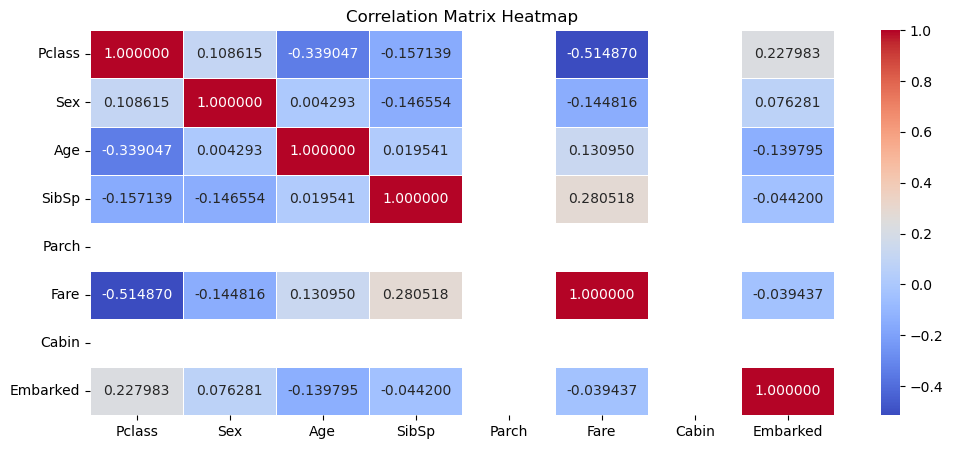

In [21]:
# heat map of the test data set
plt.figure(figsize = (12,5))
sns.heatmap(df_clean_data.corr(),annot = True, cmap = 'coolwarm',fmt = '2f',linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# training data

In [23]:
# import the train data
df_train = pd.read_csv('Titanic_train.csv')
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [24]:
# full information of the data set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
# drop the variables
df_train_data = df_train.drop(columns = ['PassengerId','Name','Ticket'],axis = 1)
df_train_data

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female   NaN      1      2  23.4500   NaN        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]

In [26]:
# checking the duplicated values
df_train_data.duplicated().sum()

107

In [27]:
# drop the duplicates values in the train data set
df_train_data.drop_duplicates(inplace =True)

In [28]:
# checking the missing values
df_train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Cabin       581
Embarked      2
dtype: int64

In [29]:
# checking the mean and mode
print(df_train_data['Age'].mean())
print(df_train_data['Cabin'].mode())
print(df_train_data['Embarked'].mode())

29.869351032448375
0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object
0    S
Name: Embarked, dtype: object


In [30]:
# fill the null values with mean and mode values
df_train_data['Age'].fillna(value = df_train_data['Age'].mean(),inplace = True)
df_train_data['Cabin'].fillna(value = df_train_data['Cabin'].mode().iloc[0],inplace = True)
df_train_data['Embarked'].fillna(value = df_train_data['Embarked'].mode().iloc[0],inplace = True)
df_train_data

Survived  Pclass     Sex        Age  SibSp  Parch     Fare    Cabin  \
0           0       3    male  22.000000      1      0   7.2500  B96 B98   
1           1       1  female  38.000000      1      0  71.2833      C85   
2           1       3  female  26.000000      0      0   7.9250  B96 B98   
3           1       1  female  35.000000      1      0  53.1000     C123   
4           0       3    male  35.000000      0      0   8.0500  B96 B98   
..        ...     ...     ...        ...    ...    ...      ...      ...   
885         0       3  female  39.000000      0      5  29.1250  B96 B98   
887         1       1  female  19.000000      0      0  30.0000      B42   
888         0       3  female  29.869351      1      2  23.4500  B96 B98   
889         1       1    male  26.000000      0      0  30.0000     C148   
890         0       3    male  32.000000      0      0   7.7500  B96 B98   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
885        Q  
887        S  
888        S  
889        C  
890        Q  

[784 rows x 9 columns]

In [31]:
# describe the train data set
df_train_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  784.000000  784.000000  784.000000  784.000000  784.000000  784.000000
mean     0.411990    2.243622   29.869351    0.522959    0.415816   34.711740
std      0.492507    0.855056   13.723745    0.986231    0.836922   52.160151
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   22.000000    0.000000    0.000000    8.050000
50%      0.000000    3.000000   29.869351    0.000000    0.000000   15.900000
75%      1.000000    3.000000   36.000000    1.000000    1.000000   34.109350
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

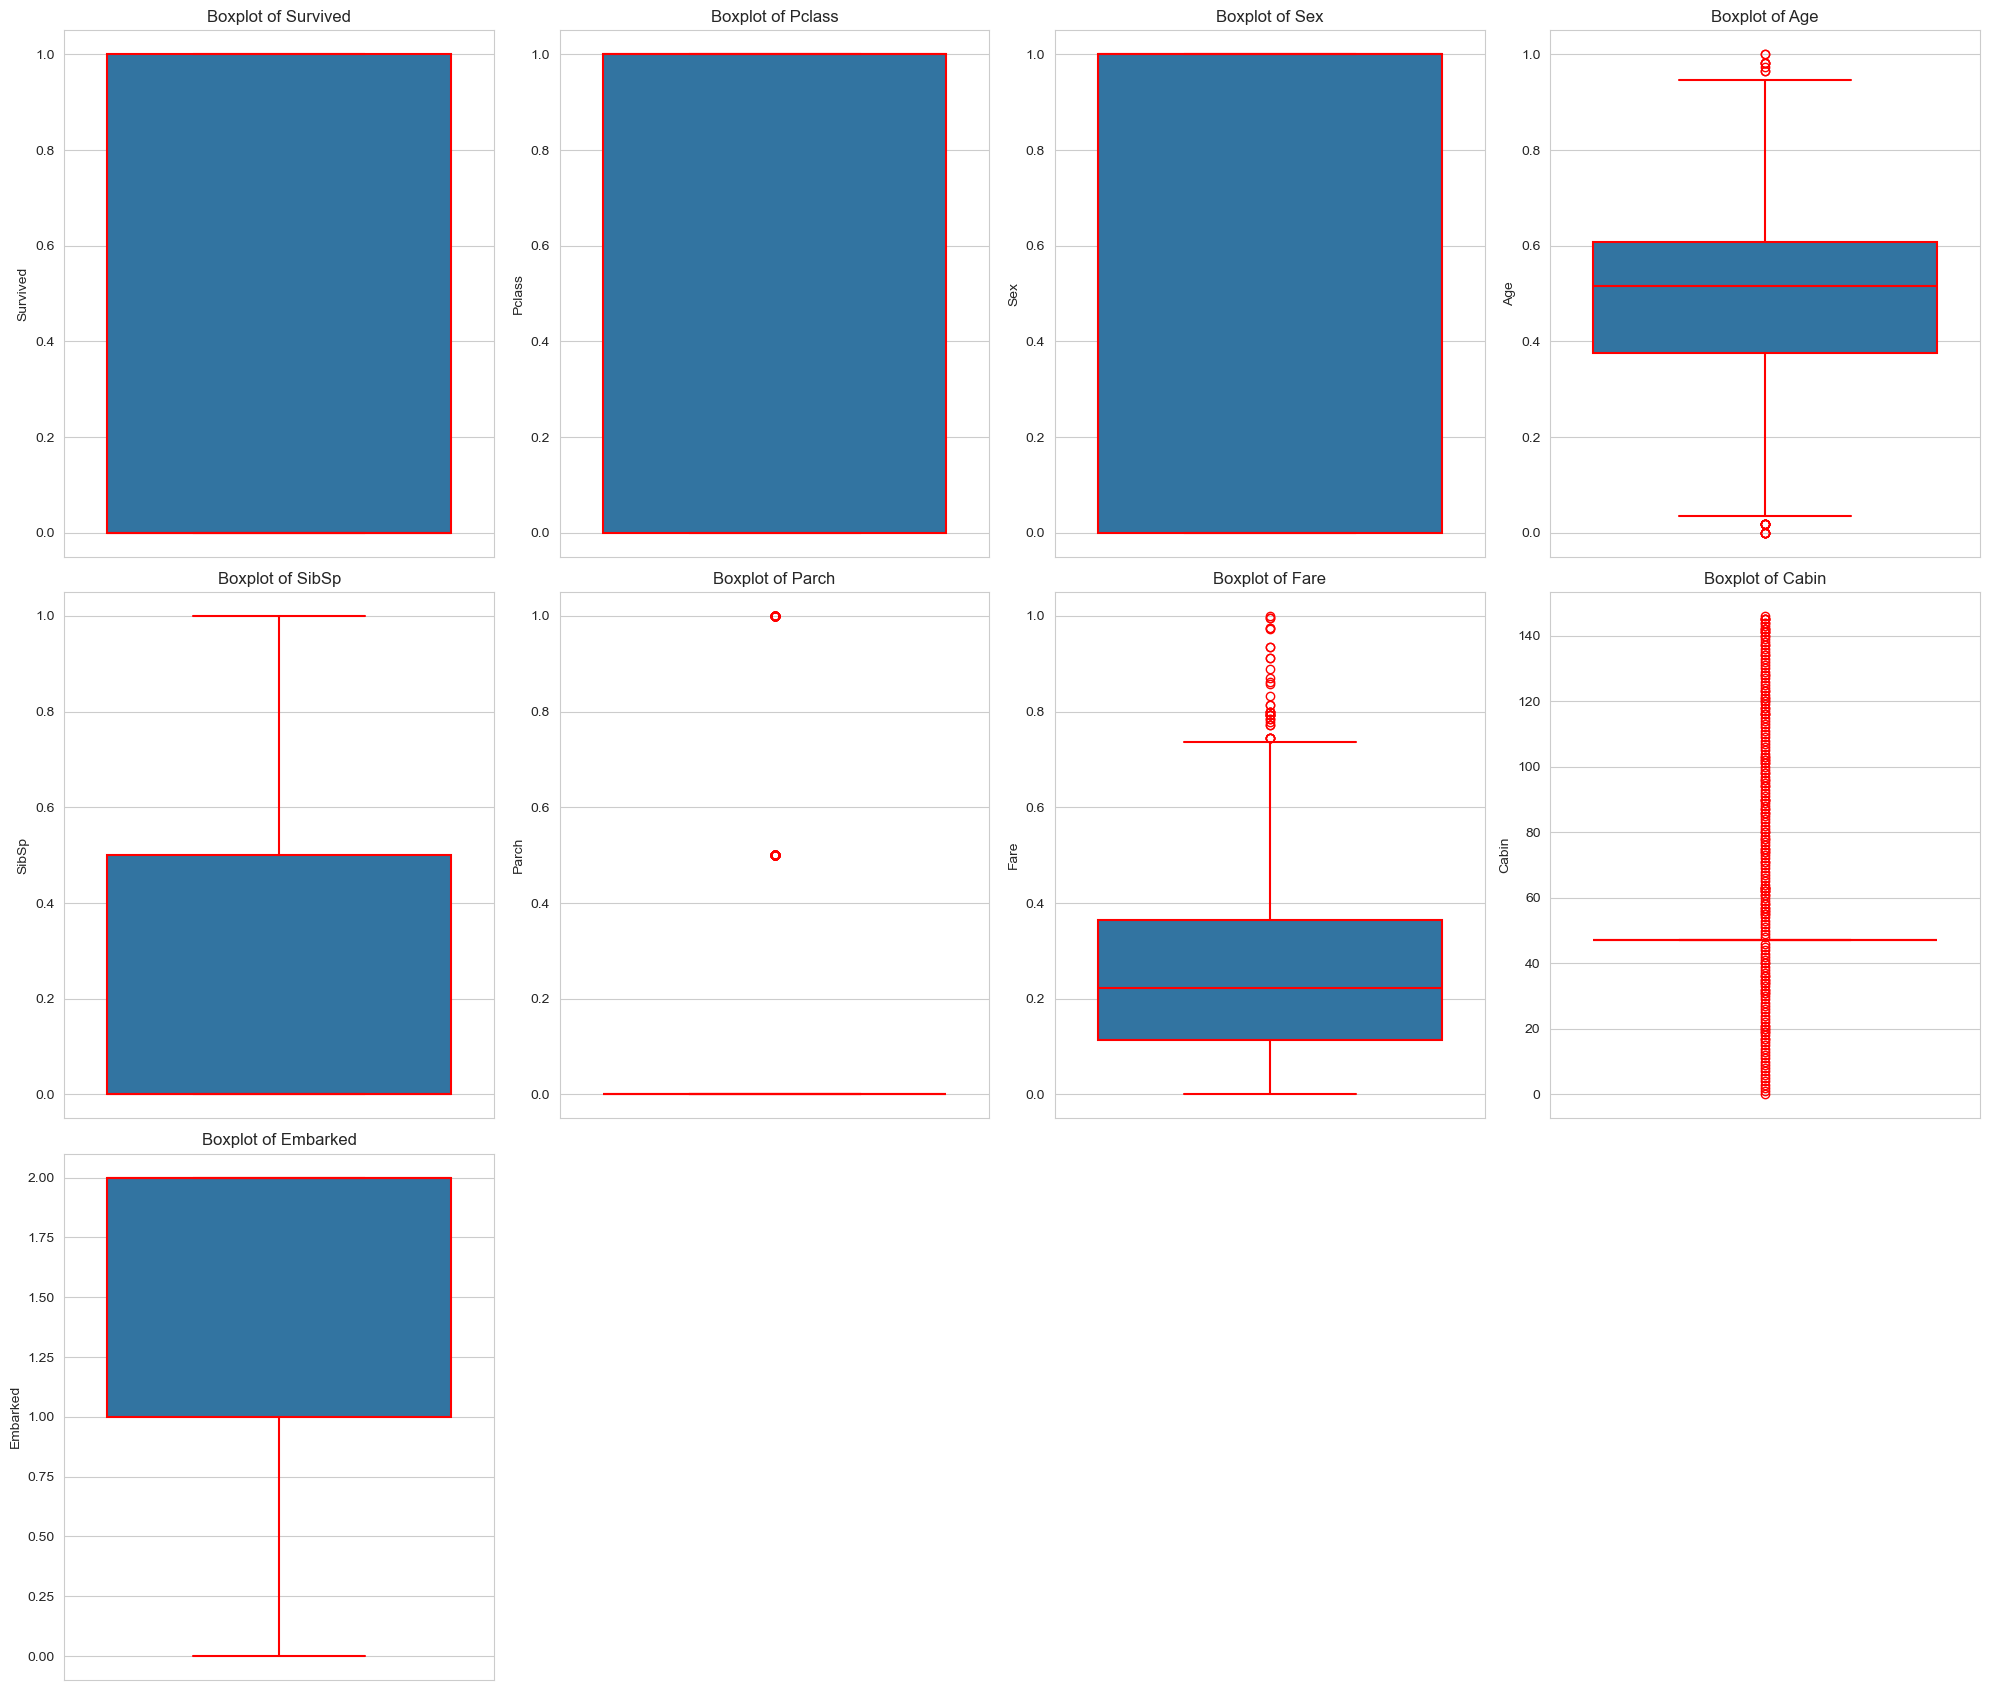

In [90]:
# creat a boxplot to identify the outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,17))
for i,column in enumerate(df_train_data.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(df_train_data[column],vert=True,linecolor='red',linewidth=1.5,)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

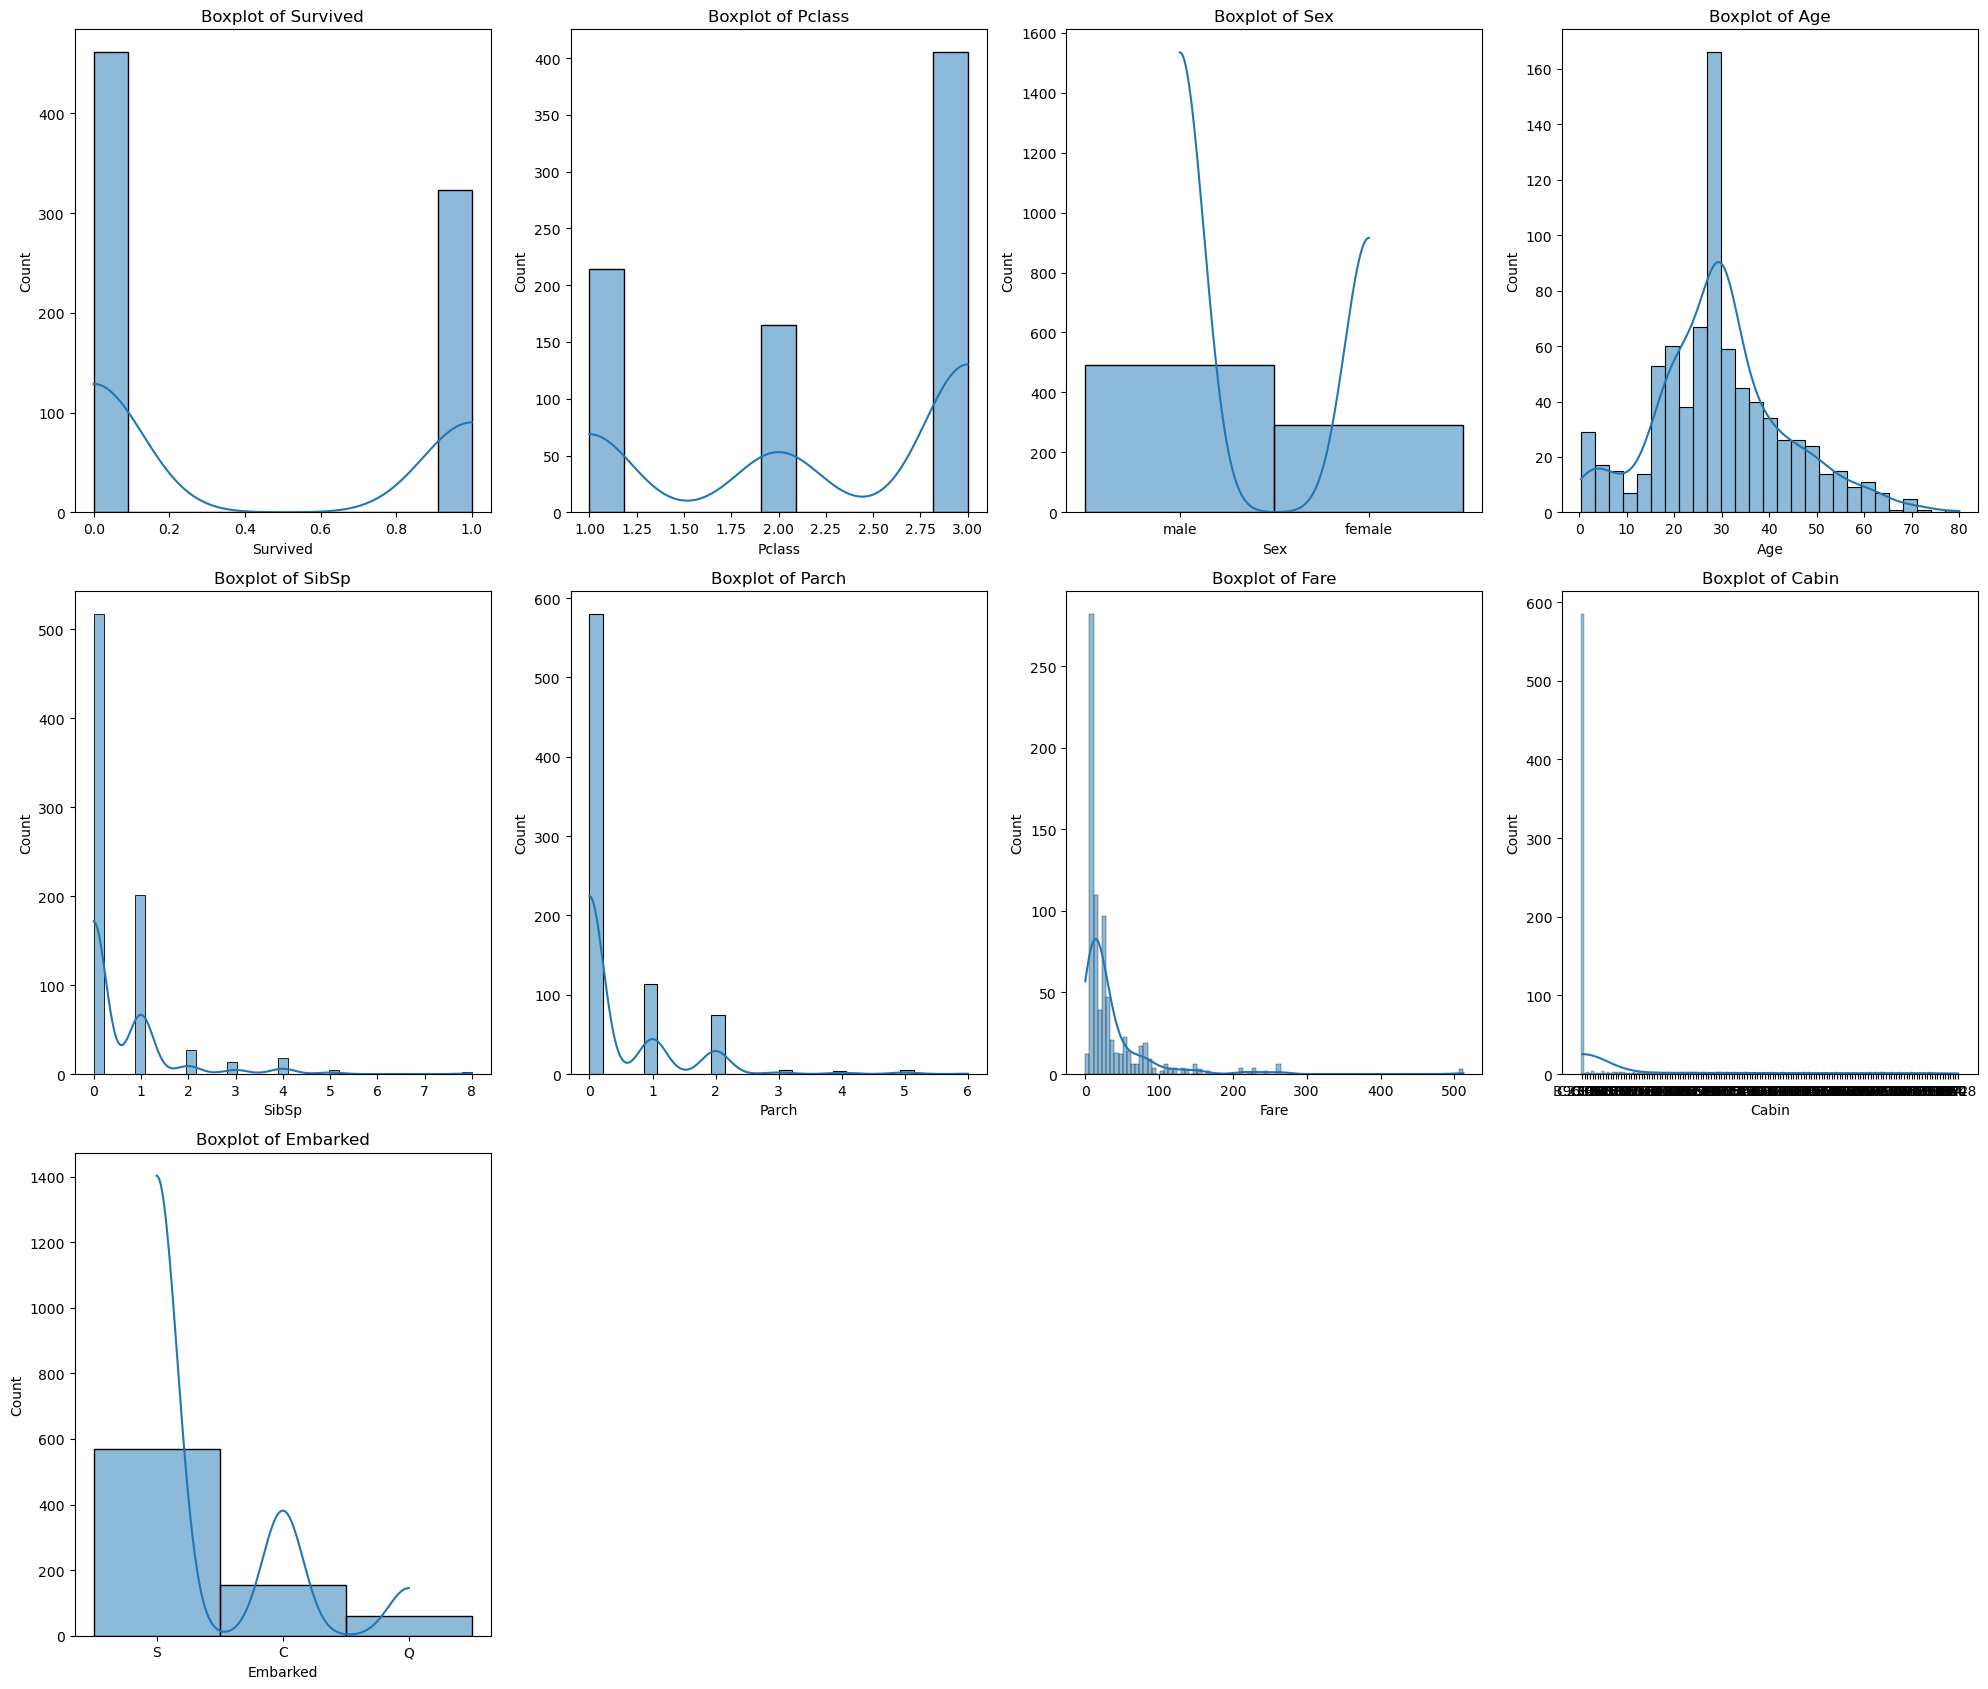

In [33]:
# creat a Histogram

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,17))
for i,column in enumerate(df_train_data.columns):
    plt.subplot(3,4,i+1)
    sns.histplot(df_train_data[column],kde=True,)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

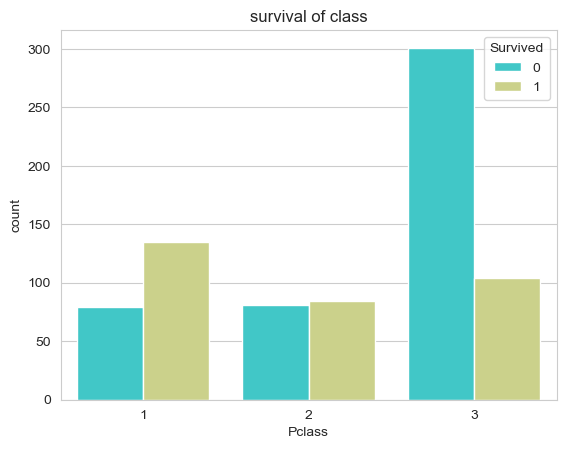

In [34]:
# visualize the gender num variables

sns.set_style('whitegrid')
sns.countplot(x = 'Pclass',hue = 'Survived', data = df_train_data, palette = 'rainbow')
plt.title('survival of class')
plt.show()

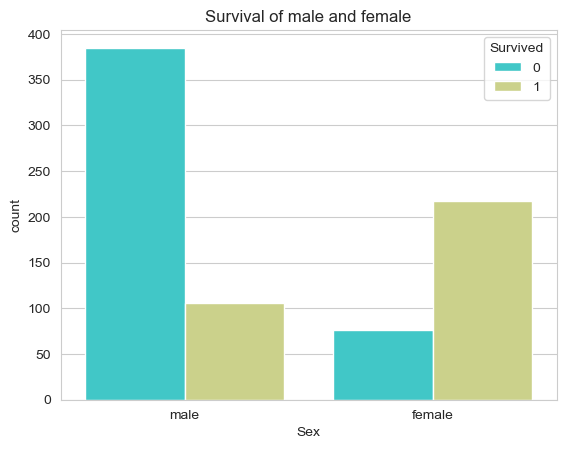

In [35]:
sns.set_style('whitegrid')
sns.countplot(x = 'Sex',hue = 'Survived',data = df_train_data, palette = 'rainbow')
plt.title('Survival of male and female')
plt.show()

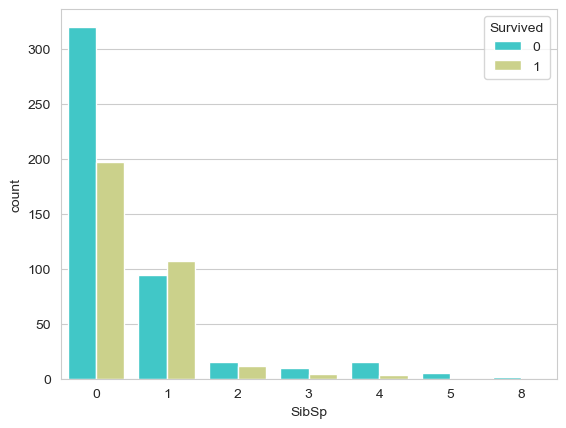

In [36]:
sns.set_style('whitegrid')
sns.countplot(x = 'SibSp', hue = 'Survived',data=df_train_data,palette = 'rainbow')
plt.show()

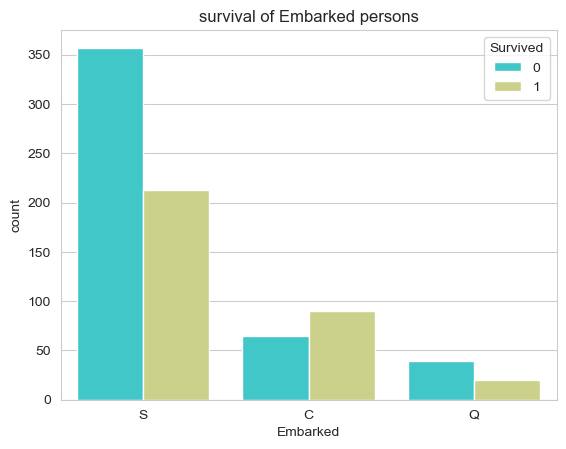

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',hue = 'Survived', data=df_train_data,palette = 'rainbow')
plt.title('survival of Embarked persons')
plt.show()

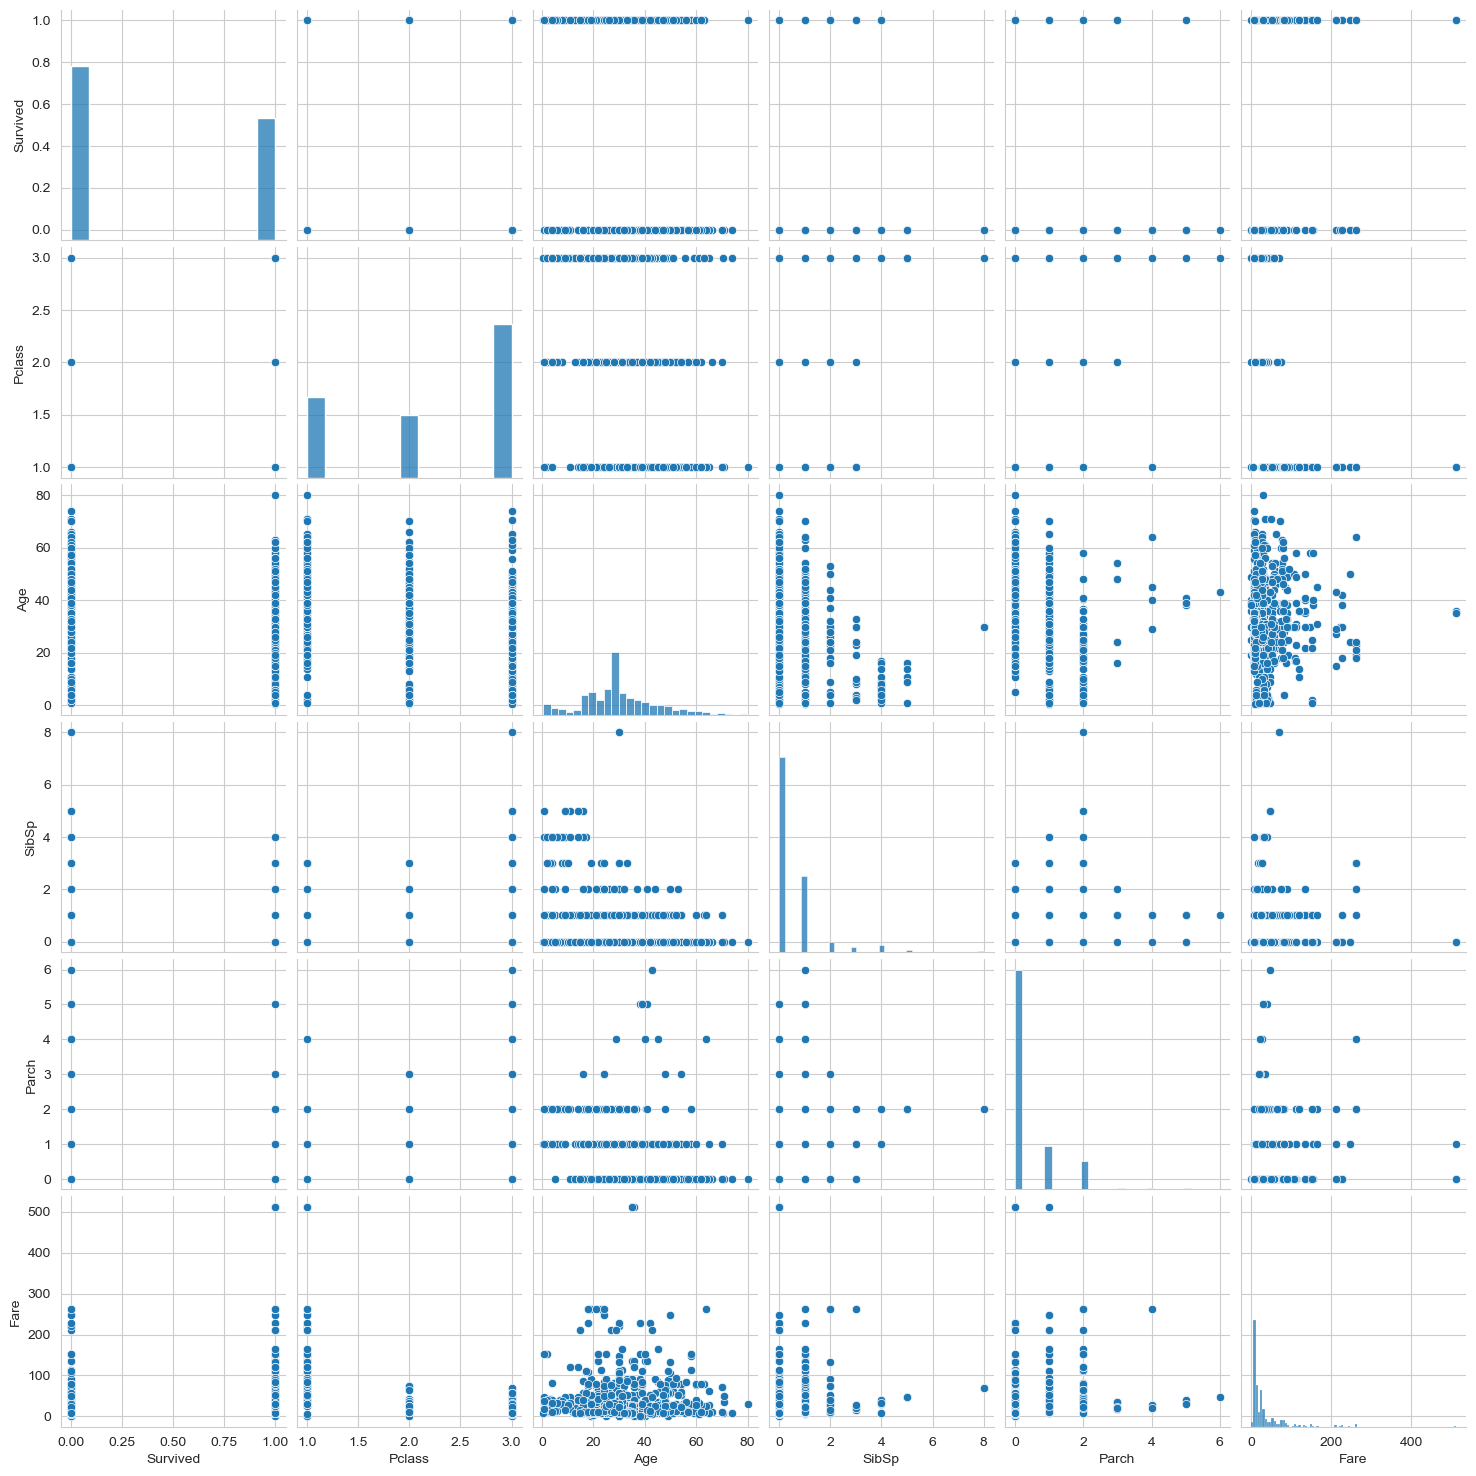

In [38]:
# pairplot of the train data set
sns.pairplot(df_train_data)
plt.show()

In [39]:
# Remove the outliers and replace with meadian

def remove_outliers_replace_with_median(df_train_data):
    for column in df_train_data.select_dtypes(include=[np.number]).columns:
        Q1 = df_train_data[column].quantile(0.25)
        Q3 = df_train_data[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        median = df_train_data[column].median()
        df_train_data[column] = df_train_data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df_train_data
df_train_clean_data = remove_outliers_replace_with_median(df_train_data)
df_train_clean_data

Survived  Pclass     Sex        Age  SibSp  Parch     Fare    Cabin  \
0           0       3    male  22.000000    1.0    0.0   7.2500  B96 B98   
1           1       1  female  38.000000    1.0    0.0  71.2833      C85   
2           1       3  female  26.000000    0.0    0.0   7.9250  B96 B98   
3           1       1  female  35.000000    1.0    0.0  53.1000     C123   
4           0       3    male  35.000000    0.0    0.0   8.0500  B96 B98   
..        ...     ...     ...        ...    ...    ...      ...      ...   
885         0       3  female  39.000000    0.0    0.0  29.1250  B96 B98   
887         1       1  female  19.000000    0.0    0.0  30.0000      B42   
888         0       3  female  29.869351    1.0    2.0  23.4500  B96 B98   
889         1       1    male  26.000000    0.0    0.0  30.0000     C148   
890         0       3    male  32.000000    0.0    0.0   7.7500  B96 B98   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
885        Q  
887        S  
888        S  
889        C  
890        Q  

[784 rows x 9 columns]

In [40]:
# LabelEncoding the data
from sklearn.preprocessing import LabelEncoder

# Select categorical columns (list, not DataFrame)
object_cols = ['Sex','Cabin','Embarked']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in object_cols:
    df_train_clean_data[col] = le.fit_transform(df_train_clean_data[col].astype(str))  # Convert to string if needed

df_train_clean_data

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0           0       3    1  22.000000    1.0    0.0   7.2500     47         2
1           1       1    0  38.000000    1.0    0.0  71.2833     81         0
2           1       3    0  26.000000    0.0    0.0   7.9250     47         2
3           1       1    0  35.000000    1.0    0.0  53.1000     55         2
4           0       3    1  35.000000    0.0    0.0   8.0500     47         2
..        ...     ...  ...        ...    ...    ...      ...    ...       ...
885         0       3    0  39.000000    0.0    0.0  29.1250     47         1
887         1       1    0  19.000000    0.0    0.0  30.0000     30         2
888         0       3    0  29.869351    1.0    2.0  23.4500     47         2
889         1       1    1  26.000000    0.0    0.0  30.0000     60         0
890         0       3    1  32.000000    0.0    0.0   7.7500     47         1

[784 rows x 9 columns]

In [41]:
# Normalization the data
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]
numeric = df_train_clean_data[numeric_cols]  

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
df_train_clean_data[numeric_cols] = scaler.fit_transform(df_train_clean_data[numeric_cols])

df_train_clean_data

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked
0           0     1.0    1  0.375000    0.5    0.0  0.101707     47         2
1           1     0.0    0  0.660714    0.5    0.0  1.000000     81         0
2           1     1.0    0  0.446429    0.0    0.0  0.111176     47         2
3           1     0.0    0  0.607143    0.5    0.0  0.744915     55         2
4           0     1.0    1  0.607143    0.0    0.0  0.112930     47         2
..        ...     ...  ...       ...    ...    ...       ...    ...       ...
885         0     1.0    0  0.678571    0.0    0.0  0.408581     47         1
887         1     0.0    0  0.321429    0.0    0.0  0.420856     30         2
888         0     1.0    0  0.515524    0.5    1.0  0.328969     47         2
889         1     0.0    1  0.446429    0.0    0.0  0.420856     60         0
890         0     1.0    1  0.553571    0.0    0.0  0.108721     47         1

[784 rows x 9 columns]

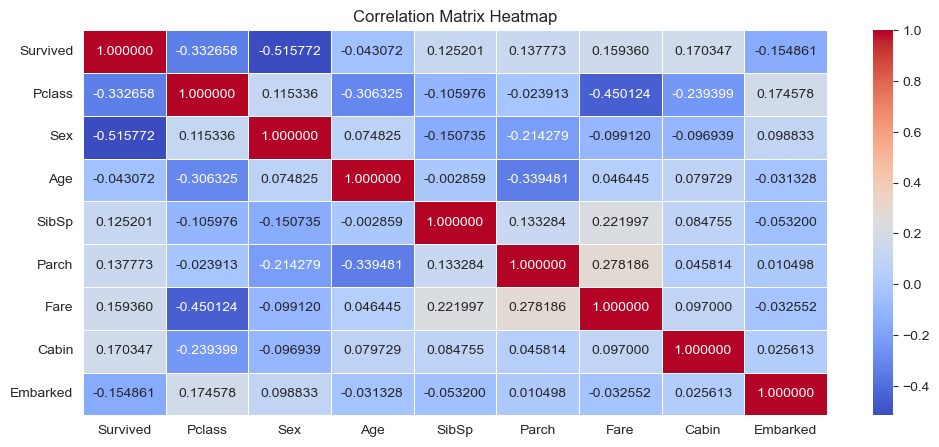

In [42]:
# heat map of the train data set

plt.figure(figsize = (12,5))
sns.heatmap(df_train_clean_data.corr(),annot = True, cmap = 'coolwarm',fmt = '2f',linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Building Predictive Models:

### **Light Gradient Boosting Machine**

In [92]:
y = df_train_clean_data['Survived']
x = df_train_clean_data.iloc[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### Hyperparameter tuning

In [103]:
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }
    model = LGBMClassifier(**params)
    score = cross_val_score(model, x_train, y_train, cv=3, scoring='accuracy')
    return score.mean()

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=50)

print("Best params LightGBM:", study_lgb.best_params)

[I 2025-06-08 01:05:08,798] A new study created in memory with name: no-name-bb7cf026-fbbd-4f5d-95b8-e911ac4f4311


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:09,023] Trial 0 finished with value: 0.7772108843537415 and parameters: {'n_estimators': 666, 'max_depth': 6, 'learning_rate': 0.005836270438645204, 'num_leaves': 126, 'subsample': 0.9149250910891573, 'colsample_bytree': 0.8746958727624718, 'reg_alpha': 3.817198597632476, 'reg_lambda': 1.5073648498825165}. Best is trial 0 with value: 0.7772108843537415.
[I 2025-06-08 01:05:09,143] Trial 1 finished with value: 0.7602040816326531 and parameters: {'n_estimators': 691, 'max_depth': 10, 'learning_rate': 0.07261438896169115, 'num_leaves': 84, 'subsample': 0.9815720011177911, 'colsample_bytree': 0.9225754078387706, 'reg_alpha': 4.730268464629427, 'reg_lambda': 4.702681467680665}. Best is trial 0 with value: 0.7772108843537415.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:09,282] Trial 2 finished with value: 0.7738095238095237 and parameters: {'n_estimators': 434, 'max_depth': 12, 'learning_rate': 0.002661201805477924, 'num_leaves': 50, 'subsample': 0.8733189094039131, 'colsample_bytree': 0.6523314118140794, 'reg_alpha': 4.298446537338888, 'reg_lambda': 2.199892030555162}. Best is trial 0 with value: 0.7772108843537415.


[LightGBM] [Info] Number of positive: 160, number of negative: 232
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.408163 -> initscore=-0.371564
[LightGBM] [Info] Start training from score -0.371564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:09,646] Trial 3 finished with value: 0.7806122448979592 and parameters: {'n_estimators': 972, 'max_depth': 5, 'learning_rate': 0.003030852891098674, 'num_leaves': 52, 'subsample': 0.9245380030458834, 'colsample_bytree': 0.6214281028187554, 'reg_alpha': 0.7931000159262519, 'reg_lambda': 3.9982903515942327}. Best is trial 3 with value: 0.7806122448979592.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:09,887] Trial 4 finished with value: 0.7874149659863945 and parameters: {'n_estimators': 612, 'max_depth': 6, 'learning_rate': 0.0069663115089390725, 'num_leaves': 135, 'subsample': 0.5504430534290192, 'colsample_bytree': 0.6999085901329016, 'reg_alpha': 1.1031586529074784, 'reg_lambda': 0.43101682726764345}. Best is trial 4 with value: 0.7874149659863945.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:10,110] Trial 5 finished with value: 0.7823129251700679 and parameters: {'n_estimators': 831, 'max_depth': 3, 'learning_rate': 0.0052835431266072186, 'num_leaves': 56, 'subsample': 0.5845681984402006, 'colsample_bytree': 0.6302319063819707, 'reg_alpha': 1.3551059475790372, 'reg_lambda': 4.528501516561139}. Best is trial 4 with value: 0.7874149659863945.
[I 2025-06-08 01:05:10,262] Trial 6 finished with value: 0.7636054421768708 and parameters: {'n_estimators': 897, 'max_depth': 3, 'learning_rate': 0.07055840821648503, 'num_leaves': 78, 'subsample': 0.6329239935638106, 'colsample_bytree': 0.5948252676175146, 'reg_alpha': 4.8106363436578965, 'reg_lambda': 1.6170402539050137}. Best is trial 4 with value: 0.7874149659863945.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:10,472] Trial 7 finished with value: 0.7874149659863946 and parameters: {'n_estimators': 900, 'max_depth': 11, 'learning_rate': 0.12929470430480947, 'num_leaves': 40, 'subsample': 0.7919488947634701, 'colsample_bytree': 0.7294038957008502, 'reg_alpha': 2.3901236470388607, 'reg_lambda': 4.157408770141847}. Best is trial 7 with value: 0.7874149659863946.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-06-08 01:05:10,667] Trial 8 finished with value: 0.7806122448979592 and parameters: {'n_estimators': 590, 'max_depth': 4, 'learning_rate': 0.0036465821249025156, 'num_leaves': 118, 'subsample': 0.7159395516192981, 'colsample_bytree': 0.524514108809501, 'reg_alpha': 3.6312742387498127, 'reg_lambda': 0.9418073921382752}. Best is trial 7 with value: 0.7874149659863946.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:10,817] Trial 9 finished with value: 0.7738095238095238 and parameters: {'n_estimators': 974, 'max_depth': 11, 'learning_rate': 0.09541956986244293, 'num_leaves': 24, 'subsample': 0.8189590736710775, 'colsample_bytree': 0.6847767131309328, 'reg_alpha': 4.315614329910934, 'reg_lambda': 4.191477597083307}. Best is trial 7 with value: 0.7874149659863946.
[I 2025-06-08 01:05:10,901] Trial 10 finished with value: 0.7823129251700681 and parameters: {'n_estimators': 129, 'max_depth': 9, 'learning_rate': 0.26415503662852424, 'num_leaves': 37, 'subsample': 0.7472718055277344, 'colsample_bytree': 0.8130154639663563, 'reg_alpha': 2.455486688237097, 'reg_lambda': 3.2355024196479447}. Best is trial 7 with value: 0.7874149659863946.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[I 2025-06-08 01:05:11,110] Trial 11 finished with value: 0.7925170068027212 and parameters: {'n_estimators': 444, 'max_depth': 7, 'learning_rate': 0.02395188812523563, 'num_leaves': 143, 'subsample': 0.527903119800459, 'colsample_bytree': 0.754273014580422, 'reg_alpha': 1.9305347197020652, 'reg_lambda': 0.34252951023957223}. Best is trial 11 with value: 0.7925170068027212.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-06-08 01:05:11,302] Trial 12 finished with value: 0.7789115646258503 and parameters: {'n_estimators': 379, 'max_depth': 8, 'learning_rate': 0.018640144258933677, 'num_leaves': 150, 'subsample': 0.5013290068619664, 'colsample_bytree': 0.7930539509180203, 'reg_alpha': 2.2640132213940425, 'reg_lambda': 3.3227825561148068}. Best is trial 11 with value: 0.7925170068027212.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:11,473] Trial 13 finished with value: 0.7976190476190476 and parameters: {'n_estimators': 301, 'max_depth': 9, 'learning_rate': 0.023581013972868332, 'num_leaves': 104, 'subsample': 0.700840189305205, 'colsample_bytree': 0.9938955920283605, 'reg_alpha': 1.8074652191849172, 'reg_lambda': 0.09288609845729998}. Best is trial 13 with value: 0.7976190476190476.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:11,634] Trial 14 finished with value: 0.7976190476190476 and parameters: {'n_estimators': 239, 'max_depth': 8, 'learning_rate': 0.01393594064407759, 'num_leaves': 106, 'subsample': 0.6518202769401795, 'colsample_bytree': 0.9997722406395052, 'reg_alpha': 0.05633171210143195, 'reg_lambda': 0.1286855430460918}. Best is trial 13 with value: 0.7976190476190476.
[I 2025-06-08 01:05:11,746] Trial 15 finished with value: 0.7908163265306123 and parameters: {'n_estimators': 187, 'max_depth': 8, 'learning_rate': 0.030764743789390796, 'num_leaves': 113, 'subsample': 0.6455994719562324, 'colsample_bytree': 0.9936347694197906, 'reg_alpha': 0.20046805367939238, 'reg_lambda': 0.08438103127579219}. Best is trial 13 with value: 0.7976190476190476.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:11,918] Trial 16 finished with value: 0.7874149659863945 and parameters: {'n_estimators': 262, 'max_depth': 9, 'learning_rate': 0.01197646925742715, 'num_leaves': 101, 'subsample': 0.683896483065848, 'colsample_bytree': 0.9883937615573269, 'reg_alpha': 0.030735208417358884, 'reg_lambda': 1.0903419011375786}. Best is trial 13 with value: 0.7976190476190476.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:12,050] Trial 17 finished with value: 0.7755102040816326 and parameters: {'n_estimators': 324, 'max_depth': 9, 'learning_rate': 0.011975075888444311, 'num_leaves': 100, 'subsample': 0.6192243061788206, 'colsample_bytree': 0.9152176581956479, 'reg_alpha': 3.294299042252776, 'reg_lambda': 2.23680179441823}. Best is trial 13 with value: 0.7976190476190476.
[I 2025-06-08 01:05:12,179] Trial 18 finished with value: 0.7738095238095237 and parameters: {'n_estimators': 234, 'max_depth': 7, 'learning_rate': 0.0015831955983351713, 'num_leaves': 70, 'subsample': 0.6976790624969282, 'colsample_bytree': 0.863231093819093, 'reg_alpha': 1.6787282406824602, 'reg_lambda': 0.6612249732720442}. Best is trial 13 with value: 0.7976190476190476.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:12,445] Trial 19 finished with value: 0.7925170068027212 and parameters: {'n_estimators': 495, 'max_depth': 10, 'learning_rate': 0.04111202763073014, 'num_leaves': 102, 'subsample': 0.7682679272162453, 'colsample_bytree': 0.927804513371981, 'reg_alpha': 0.5937146940260172, 'reg_lambda': 0.023260351968273432}. Best is trial 13 with value: 0.7976190476190476.
[I 2025-06-08 01:05:12,576] Trial 20 finished with value: 0.7738095238095237 and parameters: {'n_estimators': 315, 'max_depth': 6, 'learning_rate': 0.0010167714014102857, 'num_leaves': 69, 'subsample': 0.8338504147737749, 'colsample_bytree': 0.9620743055805173, 'reg_alpha': 2.939441528484152, 'reg_lambda': 1.554977432245062}. Best is trial 13 with value: 0.7976190476190476.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:12,802] Trial 21 finished with value: 0.7874149659863946 and parameters: {'n_estimators': 435, 'max_depth': 7, 'learning_rate': 0.02471727176329621, 'num_leaves': 150, 'subsample': 0.503918319165227, 'colsample_bytree': 0.774830176752762, 'reg_alpha': 1.917564841617183, 'reg_lambda': 0.48453722704937063}. Best is trial 13 with value: 0.7976190476190476.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:12,914] Trial 22 finished with value: 0.7891156462585034 and parameters: {'n_estimators': 148, 'max_depth': 8, 'learning_rate': 0.042495070964299116, 'num_leaves': 134, 'subsample': 0.5689827532436682, 'colsample_bytree': 0.8561146608418231, 'reg_alpha': 1.739022136334517, 'reg_lambda': 0.01043622134076616}. Best is trial 13 with value: 0.7976190476190476.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:13,129] Trial 23 finished with value: 0.7653061224489797 and parameters: {'n_estimators': 521, 'max_depth': 7, 'learning_rate': 0.01238944506343906, 'num_leaves': 94, 'subsample': 0.6602871708176485, 'colsample_bytree': 0.5312385503777698, 'reg_alpha': 3.0259555531624165, 'reg_lambda': 0.9953070540770563}. Best is trial 13 with value: 0.7976190476190476.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:13,315] Trial 24 finished with value: 0.7993197278911565 and parameters: {'n_estimators': 338, 'max_depth': 10, 'learning_rate': 0.021736129592497763, 'num_leaves': 114, 'subsample': 0.5917580084259024, 'colsample_bytree': 0.9531741861812288, 'reg_alpha': 1.2957193461875158, 'reg_lambda': 0.5385385607262434}. Best is trial 24 with value: 0.7993197278911565.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:13,501] Trial 25 finished with value: 0.7874149659863945 and parameters: {'n_estimators': 335, 'max_depth': 10, 'learning_rate': 0.010308625709976508, 'num_leaves': 115, 'subsample': 0.6056865163509411, 'colsample_bytree': 0.9569275575599782, 'reg_alpha': 0.65285850824501, 'reg_lambda': 0.7997219710429866}. Best is trial 24 with value: 0.7993197278911565.


[LightGBM] [Info] Number of positive: 160, number of negative: 232
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.408163 -> initscore=-0.371564
[LightGBM] [Info] Start training from score -0.371564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:13,650] Trial 26 finished with value: 0.7959183673469387 and parameters: {'n_estimators': 240, 'max_depth': 12, 'learning_rate': 0.043265467898454917, 'num_leaves': 110, 'subsample': 0.7056717901222896, 'colsample_bytree': 0.9593945248753345, 'reg_alpha': 1.1789237151005274, 'reg_lambda': 1.3218795371748409}. Best is trial 24 with value: 0.7993197278911565.
[I 2025-06-08 01:05:13,785] Trial 27 finished with value: 0.7840136054421768 and parameters: {'n_estimators': 204, 'max_depth': 11, 'learning_rate': 0.018996858950225303, 'num_leaves': 92, 'subsample': 0.7416417924299189, 'colsample_bytree': 0.8967607000553215, 'reg_alpha': 0.5057233470090146, 'reg_lambda': 2.023628710351584}. Best is trial 24 with value: 0.7993197278911565.
[I 2025-06-08 01:05:13,872] Trial 28 finished with value: 0.7755102040816327 and parameters: {'n_estimators': 101, 'max_depth': 9, 'learning_rate': 0.007958834221937392, 'num_leaves': 124, 'subsample': 0.6714027451614362, 'colsample_bytree': 

[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:14,049] Trial 29 finished with value: 0.7840136054421768 and parameters: {'n_estimators': 369, 'max_depth': 10, 'learning_rate': 0.0053795561021897954, 'num_leaves': 127, 'subsample': 0.5916244608218615, 'colsample_bytree': 0.9933549941415372, 'reg_alpha': 1.4682872809242853, 'reg_lambda': 1.8052616594717927}. Best is trial 24 with value: 0.7993197278911565.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:14,214] Trial 30 finished with value: 0.7976190476190476 and parameters: {'n_estimators': 281, 'max_depth': 8, 'learning_rate': 0.029779107236817925, 'num_leaves': 107, 'subsample': 0.6357460989189292, 'colsample_bytree': 0.8829532616894038, 'reg_alpha': 0.32157290244961323, 'reg_lambda': 2.6067992723335456}. Best is trial 24 with value: 0.7993197278911565.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:14,404] Trial 31 finished with value: 0.8027210884353742 and parameters: {'n_estimators': 314, 'max_depth': 8, 'learning_rate': 0.029428642619911387, 'num_leaves': 109, 'subsample': 0.644109746361614, 'colsample_bytree': 0.8846451772137732, 'reg_alpha': 0.31819536236077006, 'reg_lambda': 2.7603032460581987}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:14,618] Trial 32 finished with value: 0.79421768707483 and parameters: {'n_estimators': 368, 'max_depth': 9, 'learning_rate': 0.05618162634221876, 'num_leaves': 89, 'subsample': 0.6666879480117907, 'colsample_bytree': 0.9372964686159101, 'reg_alpha': 0.006922036455450087, 'reg_lambda': 2.8172471474948706}. Best is trial 31 with value: 0.8027210884353742.
[I 2025-06-08 01:05:14,742] Trial 33 finished with value: 0.7840136054421768 and parameters: {'n_estimators': 168, 'max_depth': 10, 'learning_rate': 0.017130058346081094, 'num_leaves': 122, 'subsample': 0.5546250543496966, 'colsample_bytree': 0.9607292467389874, 'reg_alpha': 0.8836289224710463, 'reg_lambda': 3.698563976767354}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Info] Number of positive: 160, number of negative: 232
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.408163 -> initscore=-0.371564
[LightGBM] [Info] Start training from score -0.371564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:14,920] Trial 34 finished with value: 0.7908163265306123 and parameters: {'n_estimators': 283, 'max_depth': 8, 'learning_rate': 0.014871580317857947, 'num_leaves': 83, 'subsample': 0.7257467384537737, 'colsample_bytree': 0.9103108056981581, 'reg_alpha': 0.3686972091509012, 'reg_lambda': 1.212070891640331}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:15,239] Trial 35 finished with value: 0.7993197278911565 and parameters: {'n_estimators': 703, 'max_depth': 6, 'learning_rate': 0.00913401670506956, 'num_leaves': 105, 'subsample': 0.6191145545198187, 'colsample_bytree': 0.9990071118800404, 'reg_alpha': 1.3217797286989672, 'reg_lambda': 0.5726805644309622}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:15,540] Trial 36 finished with value: 0.7976190476190476 and parameters: {'n_estimators': 699, 'max_depth': 5, 'learning_rate': 0.009353732491200929, 'num_leaves': 131, 'subsample': 0.9975816681237146, 'colsample_bytree': 0.9423720393210693, 'reg_alpha': 1.4311777396771537, 'reg_lambda': 0.6843353083941744}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:15,803] Trial 37 finished with value: 0.7874149659863946 and parameters: {'n_estimators': 670, 'max_depth': 5, 'learning_rate': 0.0038675012697345543, 'num_leaves': 99, 'subsample': 0.6116914488687437, 'colsample_bytree': 0.8702962712714917, 'reg_alpha': 2.1511970720423537, 'reg_lambda': 0.50859665585531}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:15,985] Trial 38 finished with value: 0.7806122448979592 and parameters: {'n_estimators': 757, 'max_depth': 6, 'learning_rate': 0.13987963925043062, 'num_leaves': 81, 'subsample': 0.9170252779130584, 'colsample_bytree': 0.8395150111340228, 'reg_alpha': 2.6892600658101857, 'reg_lambda': 2.417540826460646}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:16,237] Trial 39 finished with value: 0.7959183673469389 and parameters: {'n_estimators': 585, 'max_depth': 11, 'learning_rate': 0.05793318716945409, 'num_leaves': 120, 'subsample': 0.5398170425979644, 'colsample_bytree': 0.9730400457671138, 'reg_alpha': 1.1513404605514306, 'reg_lambda': 1.8585216347377187}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:16,540] Trial 40 finished with value: 0.7891156462585034 and parameters: {'n_estimators': 784, 'max_depth': 5, 'learning_rate': 0.007166494684232637, 'num_leaves': 74, 'subsample': 0.5862092137227233, 'colsample_bytree': 0.8925555433873513, 'reg_alpha': 1.6749849764787552, 'reg_lambda': 1.3908305801621381}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:16,806] Trial 41 finished with value: 0.7993197278911565 and parameters: {'n_estimators': 472, 'max_depth': 9, 'learning_rate': 0.02495235296296974, 'num_leaves': 107, 'subsample': 0.6483774524641603, 'colsample_bytree': 0.9972509750372589, 'reg_alpha': 0.9586354414554636, 'reg_lambda': 0.2876067116631892}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:17,051] Trial 42 finished with value: 0.8027210884353742 and parameters: {'n_estimators': 421, 'max_depth': 9, 'learning_rate': 0.024103228159394367, 'num_leaves': 111, 'subsample': 0.625637555607356, 'colsample_bytree': 0.9754428004664811, 'reg_alpha': 0.8192411227179153, 'reg_lambda': 0.293263782716166}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:17,360] Trial 43 finished with value: 0.8010204081632653 and parameters: {'n_estimators': 481, 'max_depth': 10, 'learning_rate': 0.031955020968540436, 'num_leaves': 113, 'subsample': 0.6246171642022653, 'colsample_bytree': 0.9342721237454354, 'reg_alpha': 0.8293423051333837, 'reg_lambda': 0.3353652558061372}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:17,655] Trial 44 finished with value: 0.7993197278911565 and parameters: {'n_estimators': 548, 'max_depth': 10, 'learning_rate': 0.03109853545716036, 'num_leaves': 114, 'subsample': 0.5804821061682189, 'colsample_bytree': 0.9343448669842042, 'reg_alpha': 0.7556306214707359, 'reg_lambda': 0.6939912810431188}. Best is trial 31 with value: 0.8027210884353742.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:17,873] Trial 45 finished with value: 0.8044217687074829 and parameters: {'n_estimators': 625, 'max_depth': 11, 'learning_rate': 0.07177700910294116, 'num_leaves': 95, 'subsample': 0.6214136747448933, 'colsample_bytree': 0.9147136968298984, 'reg_alpha': 1.3371207098676365, 'reg_lambda': 0.8845207856799056}. Best is trial 45 with value: 0.8044217687074829.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-08 01:05:18,091] Trial 46 finished with value: 0.7687074829931974 and parameters: {'n_estimators': 400, 'max_depth': 12, 'learning_rate': 0.12704480422483166, 'num_leaves': 95, 'subsample': 0.5610703746620367, 'colsample_bytree': 0.908036165358078, 'reg_alpha': 0.5054765900548828, 'reg_lambda': 0.3314641067408819}. Best is trial 45 with value: 0.8044217687074829.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:18,302] Trial 47 finished with value: 0.8010204081632653 and parameters: {'n_estimators': 600, 'max_depth': 11, 'learning_rate': 0.08611548439795459, 'num_leaves': 139, 'subsample': 0.5239576132259671, 'colsample_bytree': 0.8021943790071641, 'reg_alpha': 1.0910743282705597, 'reg_lambda': 0.8466287550183569}. Best is trial 45 with value: 0.8044217687074829.


[LightGBM] [Info] Number of positive: 161, number of negative: 231
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 392, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.410714 -> initscore=-0.361013
[LightGBM] [Info] Start training from score -0.361013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-06-08 01:05:18,579] Trial 48 finished with value: 0.8010204081632653 and parameters: {'n_estimators': 626, 'max_depth': 11, 'learning_rate': 0.08674336785886433, 'num_leaves': 140, 'subsample': 0.5361868311836501, 'colsample_bytree': 0.8038684341373379, 'reg_alpha': 0.9910796725615874, 'reg_lambda': 4.986655145254224}. Best is trial 45 with value: 0.8044217687074829.
[I 2025-06-08 01:05:18,755] Trial 49 finished with value: 0.79421768707483 and parameters: {'n_estimators': 628, 'max_depth': 12, 'learning_rate': 0.21841773388589605, 'num_leaves': 140, 'subsample': 0.5136536577808537, 'colsample_bytree': 0.7324115776214197, 'reg_alpha': 0.7639687239863677, 'reg_lambda': 0.8619081278732554}. Best is trial 45 with value: 0.8044217687074829.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [107]:
model = LGBMClassifier(n_estimators=625,max_depth=11,learning_rate=0.07,num_leaves=95,subsample= 0.62,colsample_bytree=0.91,reg_alpha= 1.13,reg_lambda=0.88)
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 241, number of negative: 347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 588, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.409864 -> initscore=-0.364528
[LightGBM] [Info] Start training from score -0.364528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(colsample_bytree=0.91, learning_rate=0.07, max_depth=11,
               n_estimators=625, num_leaves=95, reg_alpha=1.13, reg_lambda=0.88,
               subsample=0.62)

In [109]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [111]:
y_pred_series = pd.Series(y_pred)

# Now you can use value_counts()
y_pred_counts = y_pred_series.value_counts()

print(y_pred_counts)

0    124
1     72
Name: count, dtype: int64


In [115]:
#predictions
predictions=[round(value) for value in y_pred]

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming you have already trained your XGBoost model and have predictions (y_pred)
# and true labels (y_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"LGBM Accuracy: {accuracy}")
print(f"LGBM Precision: {precision}")
print(f"LGBM Recall: {recall}")

LGBM Accuracy: 0.7857142857142857
LGBM Precision: 0.7777777777777778
LGBM Recall: 0.6829268292682927


### **XGBOOST**

In [85]:
# fit model no training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [60]:
pip install optuna xgboost lightgbm scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
import optuna

### Hyperparameter tunning

In [70]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    model = XGBClassifier(**params)
    score = cross_val_score(model, x_train, y_train, cv=3, scoring='accuracy')
    return score.mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

print("Best params XGBoost:", study_xgb.best_params)

[I 2025-06-08 00:34:53,950] A new study created in memory with name: no-name-b5afd5af-f3f0-40d6-8d1f-f4117d86f244
[I 2025-06-08 00:34:54,722] Trial 0 finished with value: 0.7714285714285715 and parameters: {'n_estimators': 534, 'max_depth': 3, 'learning_rate': 0.0016221503232181891, 'subsample': 0.8892319984537629, 'colsample_bytree': 0.8493679128413782, 'gamma': 3.6052723088743517, 'reg_alpha': 1.6107073010009425, 'reg_lambda': 2.4516445524018167}. Best is trial 0 with value: 0.7714285714285715.
[I 2025-06-08 00:34:54,964] Trial 1 finished with value: 0.7714285714285714 and parameters: {'n_estimators': 254, 'max_depth': 6, 'learning_rate': 0.07521069887001319, 'subsample': 0.6971262141743051, 'colsample_bytree': 0.8303254765209429, 'gamma': 3.122393578928018, 'reg_alpha': 3.436677999968329, 'reg_lambda': 2.681499992046492}. Best is trial 0 with value: 0.7714285714285715.
[I 2025-06-08 00:34:55,695] Trial 2 finished with value: 0.7714285714285714 and parameters: {'n_estimators': 991, '

Best params XGBoost: {'n_estimators': 552, 'max_depth': 8, 'learning_rate': 0.05291475199524541, 'subsample': 0.8910643537547326, 'colsample_bytree': 0.8681788685339616, 'gamma': 0.3663281443702905, 'reg_alpha': 1.130051350201251, 'reg_lambda': 2.1665164873953167}


In [76]:
model = XGBClassifier(n_estimators=552, max_depth=8,learning_rate=0.05, subsample=0.89, colsample_bytree=0.86, gamma=0.36, reg_alpha=1.13, reg_lambda=2.16)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.86, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.36, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=552,
              n_jobs=None, num_parallel_tree=None, ...)

In [78]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
y_pred_xb = model.predict(x_test)
y_pred_xb

(525, 8) (525,) (259, 8) (259,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [82]:
#accuracy, precision, recall xgboost

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred_xb)
precision = precision_score(y_test, y_pred_xb)
recall = recall_score(y_test, y_pred_xb)

print(f"XGBoost Accuracy: {accuracy}")
print(f"XGBoost Precision: {precision}")
print(f"XGBoost Recall: {recall}")

XGBoost Accuracy: 0.7876447876447876
XGBoost Precision: 0.7422680412371134
XGBoost Recall: 0.7058823529411765


# **Comparative Analysis:**

## **1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.**

Based on the performance metrics you provided for both LightGBM and XGBoost, here’s a comparison:

| **Metric**     | **XGBoost**              | **LightGBM**            | **Observation**                                                |
|----------------|--------------------------|-------------------------|----------------------------------------------------------------|
| **Accuracy**   | 0.7876                    | 0.7857                  | XGboost have almost equal accuracy indicating better overall performance. |
| **Precision**  | 0.7422                    | 0.7777                 | LightGBM has higher precision, meaning it has fewer false positives. |
| **Recall**     | 0.7058                    | 0.6829                  | XGboost has slightly higher recall, meaning it correctly identifies more actual positives. |

### Key Observations:
- **LightGBM and XGBoost** in have almost same precision with 0.03 difference and in accuracy as well.
- **XGBoost outperforms LightGBM** in metrics like recall.


XGboost may be the better model in terms of overall performance.



---

2.	**Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.**

To visualize the results, a bar chart can be used to compare the accuracy, precision, and recall of XGBoost and LightGBM. Each bar would represent a performance metric for both models side by side. The **strengths** of LightGBM would be highlighted by its **slightly higher precision **, showing that it is better at correctly predicting positives and reducing false positives. However, both models have slight difference in recall, indicating they are equally capable of identifying true positives.

The **weakness** of XGBoost is its relatively **lower precision**, meaning it may produce more false positives, though its recall is still comparable to LightGBM. The visualization helps identify which areas (e.g., precision, recall) each model excels in or needs improvement, providing clear insights into their comparative performance.

